# **Clustering Countries for HELP International NGO** #

## **Problem Statement** ##

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. HELP International have been able to raise around $ 10 million. This money now needs to be allocated strategically and effectively. Hence, inorder to decide the selection of the countries that are in the direst need of aid, data driven decisions are to be made. Thus, it becomes necessary to categorize the countries using socio-economic and health factors that determine the overall development of the country. Thus, based on these clusters of the countries depending on their conditions, funds will be allocated for assistance during the time of disasters and natural calamities. It is a clear cut case of unsupervised learning where we have to create clusters of the countries based on the different feature present.

## **Aim** ##

- To cluster countries based on numerical features.
- It is an **Unsupervised Learning** problem statement.


## **Data** ##

The dataset used is found on [Kaggle and was collected by HELP International](https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data)

- country : Name of the country
- child_mort : Death of children under 5 years of age per 1000 live births
- exports : Exports of goods and services per capita. Given as %age of the GDP per capita
- health : Total health spending per capita. Given as %age of GDP per capita
- imports : Imports of goods and services per capita. Given as %age of the GDP per capita
- income : Net income per person
- inflation : The measurement of the annual growth rate of the Total GDP
- life_expec : The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer : The number of children that would be born to each woman if the current age-fertility rates remain the same
- gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.

**Loading the data**

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from matplotlib import colors
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [76]:
country_data = pd.read_csv('Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [77]:
country_data.shape

(167, 10)

In [78]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [79]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [80]:
#checking for null values
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No Null values in the dataset

In [81]:
#checking for duplicates
country_data.duplicated().sum()

0

No duplicates in the dataset

In [82]:
country_data[['exports','health','imports']] = country_data[['exports','health','imports']].apply(lambda x : x*country_data["gdpp"]/100)
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


- There is only 1 categorical column here, i.e. 'country'
- Rest all columns are numeric
- There are no missing values in the data, hence missing value handling is not required.
- All columns have correct datatypes, hence type casting is not required.
- 'exports', 'health', 'imports' are given in percentage of gdpp. This features are converted to their actual values.

# **Exploratory Data Analysis** #

In [83]:
col = list(country_data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


**Distribution of Features**

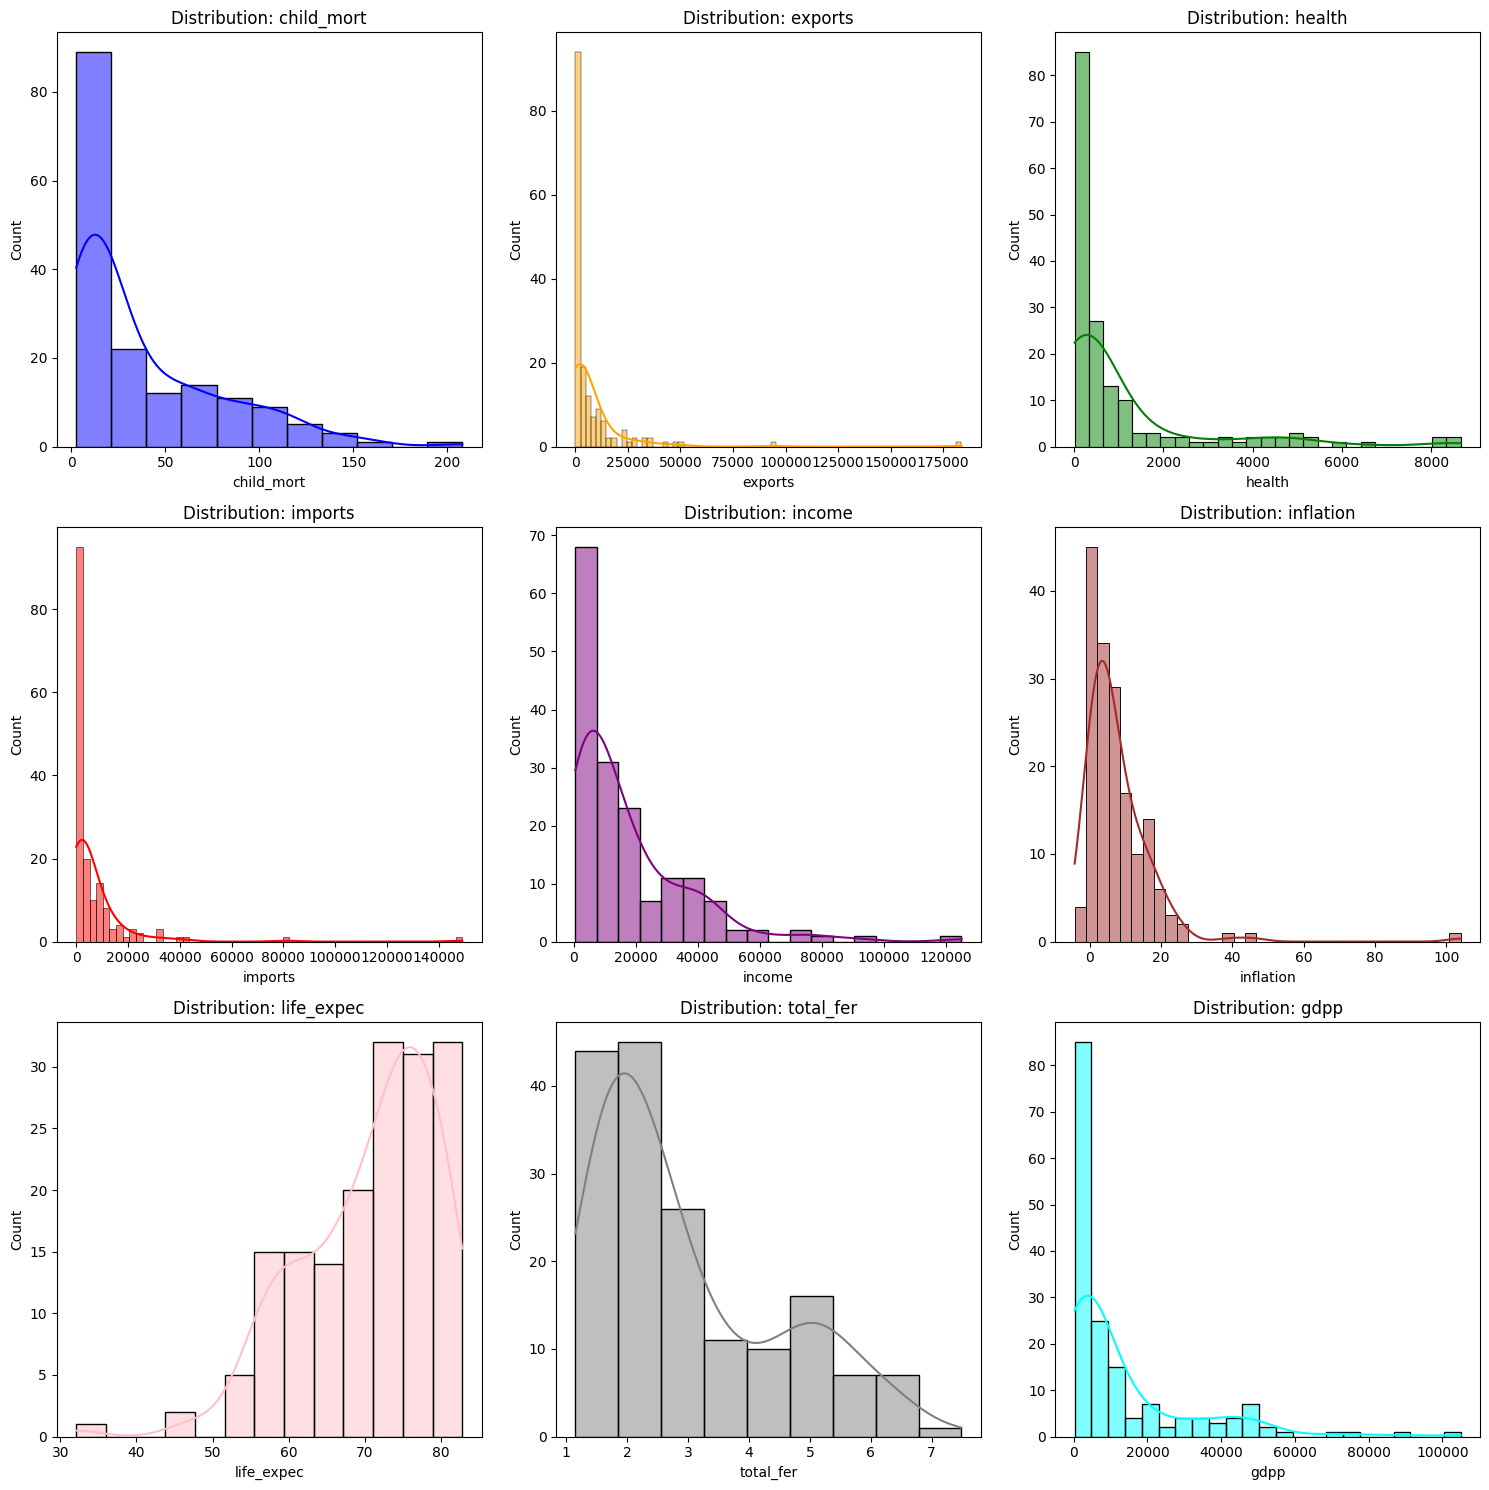

In [166]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan']
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(len(numerical_features)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(country_data[numerical_features[i]], kde=True, color=colors[i % len(colors)]) 
    title = 'Distribution: ' + numerical_features[i]
    plt.title(title)

plt.tight_layout()
plt.show()

Observations: 
- life_expec displays a left or negatively skewed data distribution.
- health displays a normally distrubuted data.
- All the remaining features show a right or positively skewed data distribution.
- Data distribution of country is not put out as it has text data and it has the same number of unique values as the length of the dataframe.

Features of Economically Backward Countries :

- The country's per capita income is very low.
- High Population that leads to non - availability of resources.
- Unemployment due to less resources.
- Low country wealth that leads to low capital.
- Inequitable distribution of wealth and income.
- Lack of proper educational amenities and thus illiteracy prevails.
- Low level of living.
- No technical advancement.
- Poor health services coupled with high birth & death rates.

HELP Foundation needs to target the countries that display the above characteristics. We will now visualize the data and find the countries that lie at the extremes and the center of the each feature to point out the countries that require assistance!

**Country Vs Numerical Features**

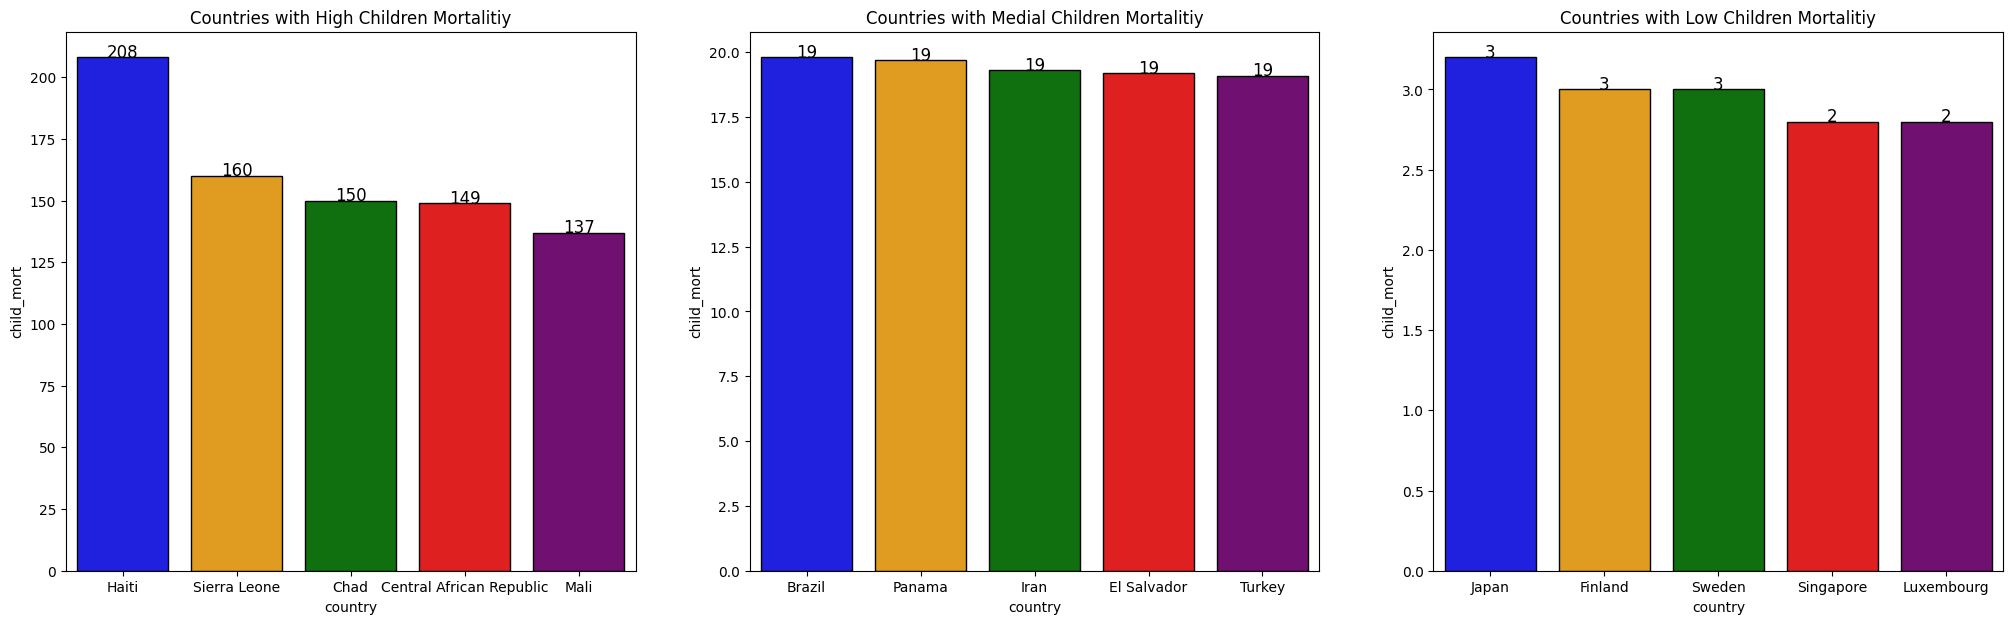

In [85]:
#Country by child mortality
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = country_data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = country_data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = country_data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

Observations: 
- Haiti has the highest children's deaths. African countries have significant positions in this statistic.
- At the other extreme of child_mort, countries from Asia and Europe has some solid presence.

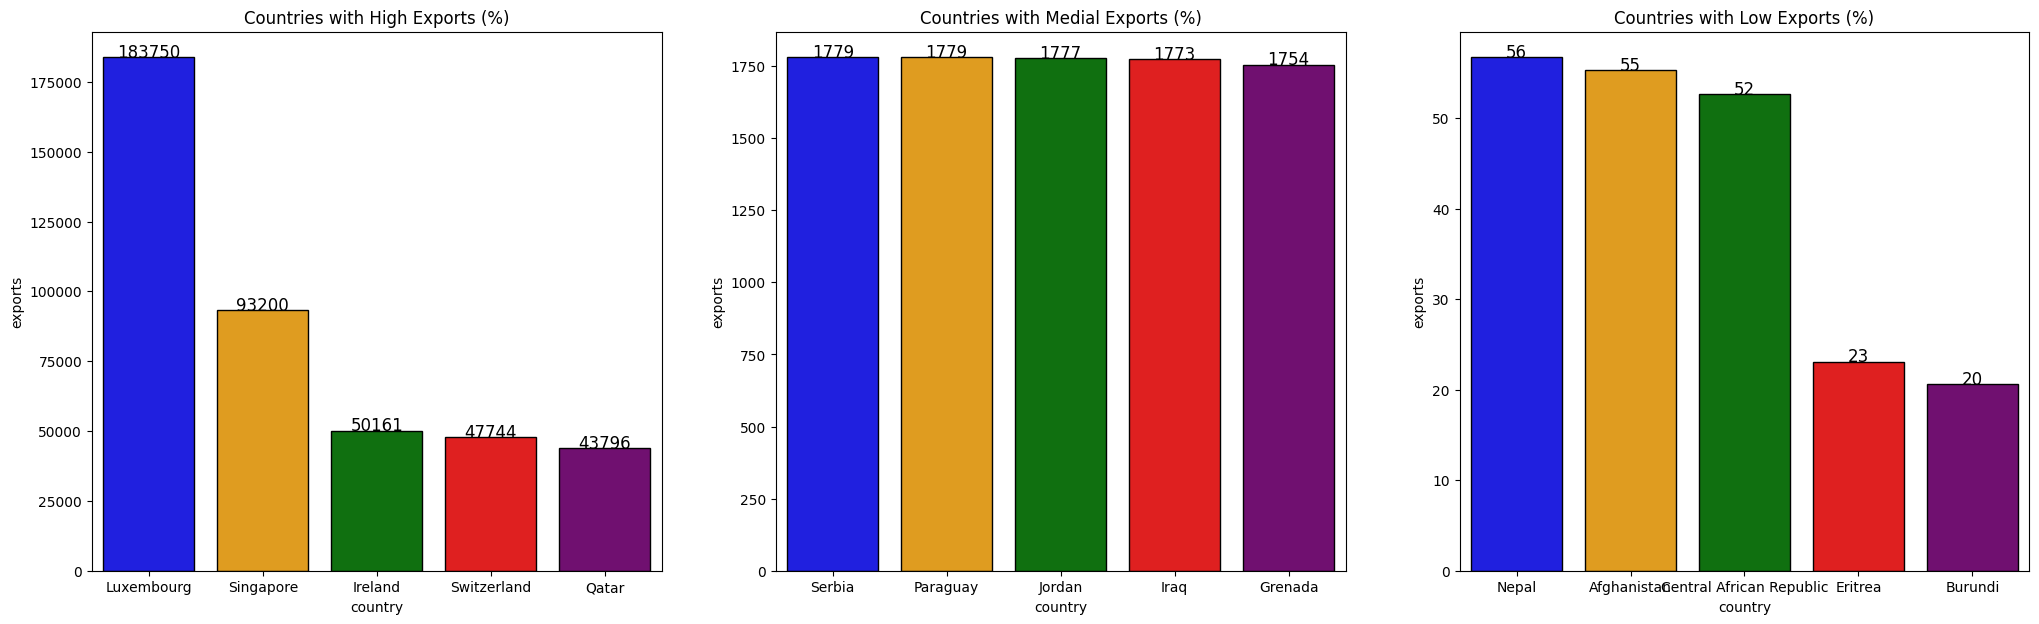

In [86]:
#Country by exports
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'exports', data = country_data.sort_values(ascending = False,by = 'exports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'exports', data = country_data.sort_values(ascending = False,by = 'exports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'exports', data = country_data.sort_values(ascending = False,by = 'exports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

Observations:
- exports of a nation are usually goods and services created domestically but sold to other nations. Goods and services exported depends on factors like the geographical location, natural resources, population size & their preference towards specific skills, etc.
- Despite Singapore's population size not being in the top 100, they have the highest number of exports. Luxembourg & Malta have probably followed the same route.
- Afghanistan & Nepal are present in the lower end of exports. Geographical locations of these nations have a heavy influence. Countries with lower exports also have small geographical area.

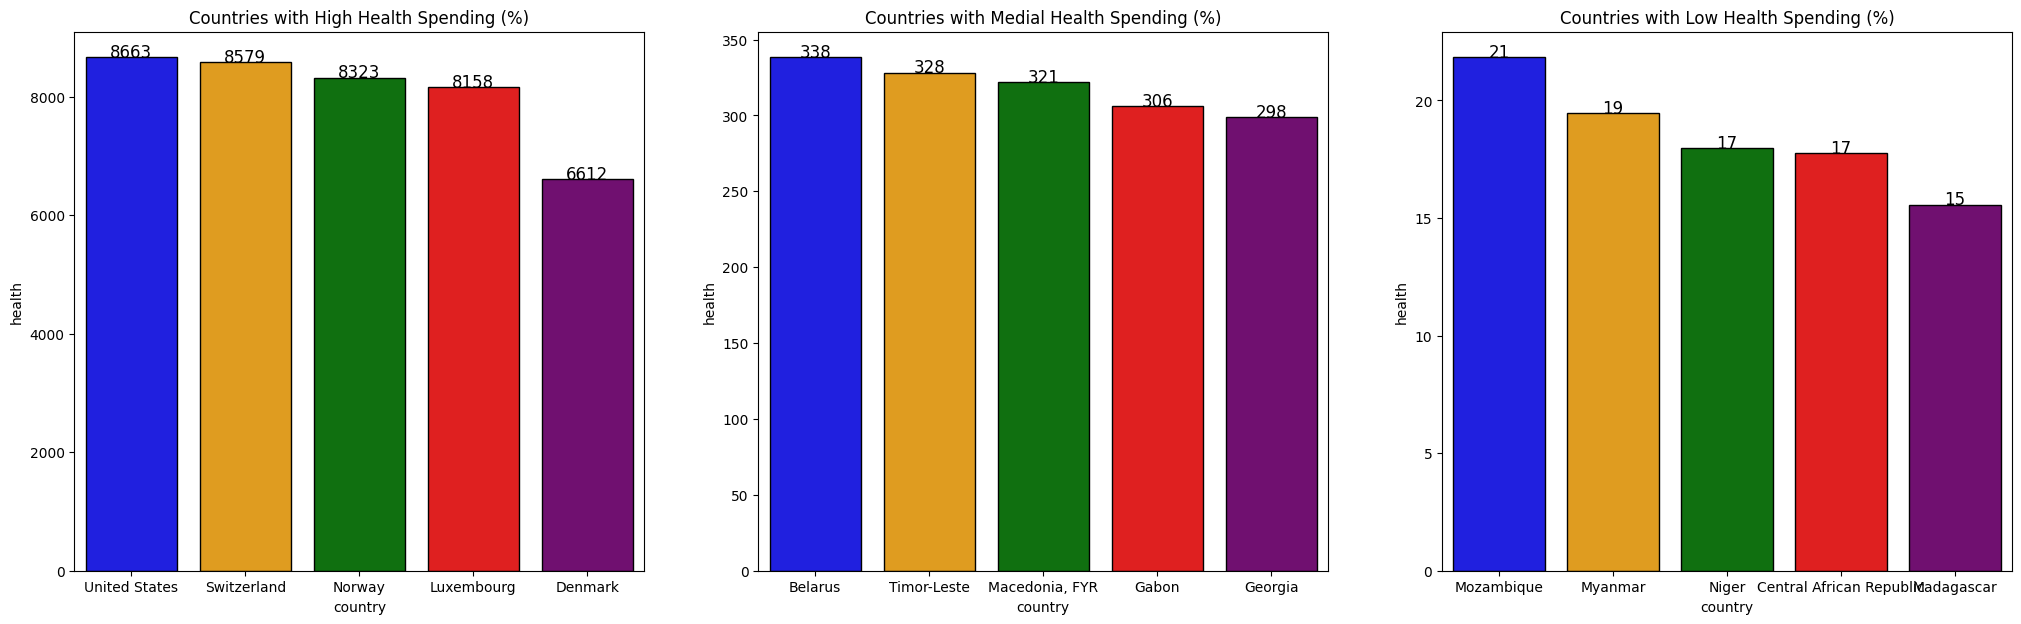

In [87]:
#Country by health
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'health', data = country_data.sort_values(ascending = False,by = 'health').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'health', data = country_data.sort_values(ascending = False,by = 'health').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'health', data = country_data.sort_values(ascending = False,by = 'health').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- US stands at the top when it comes to spending on health with 17% of the individual GDP contribution.
- 6% seems to be the mean values of the citizens spending on their health.
- Asian countries dominate the lower end of health with less than 3%. They are the most ignorant citizens when it comes to health.

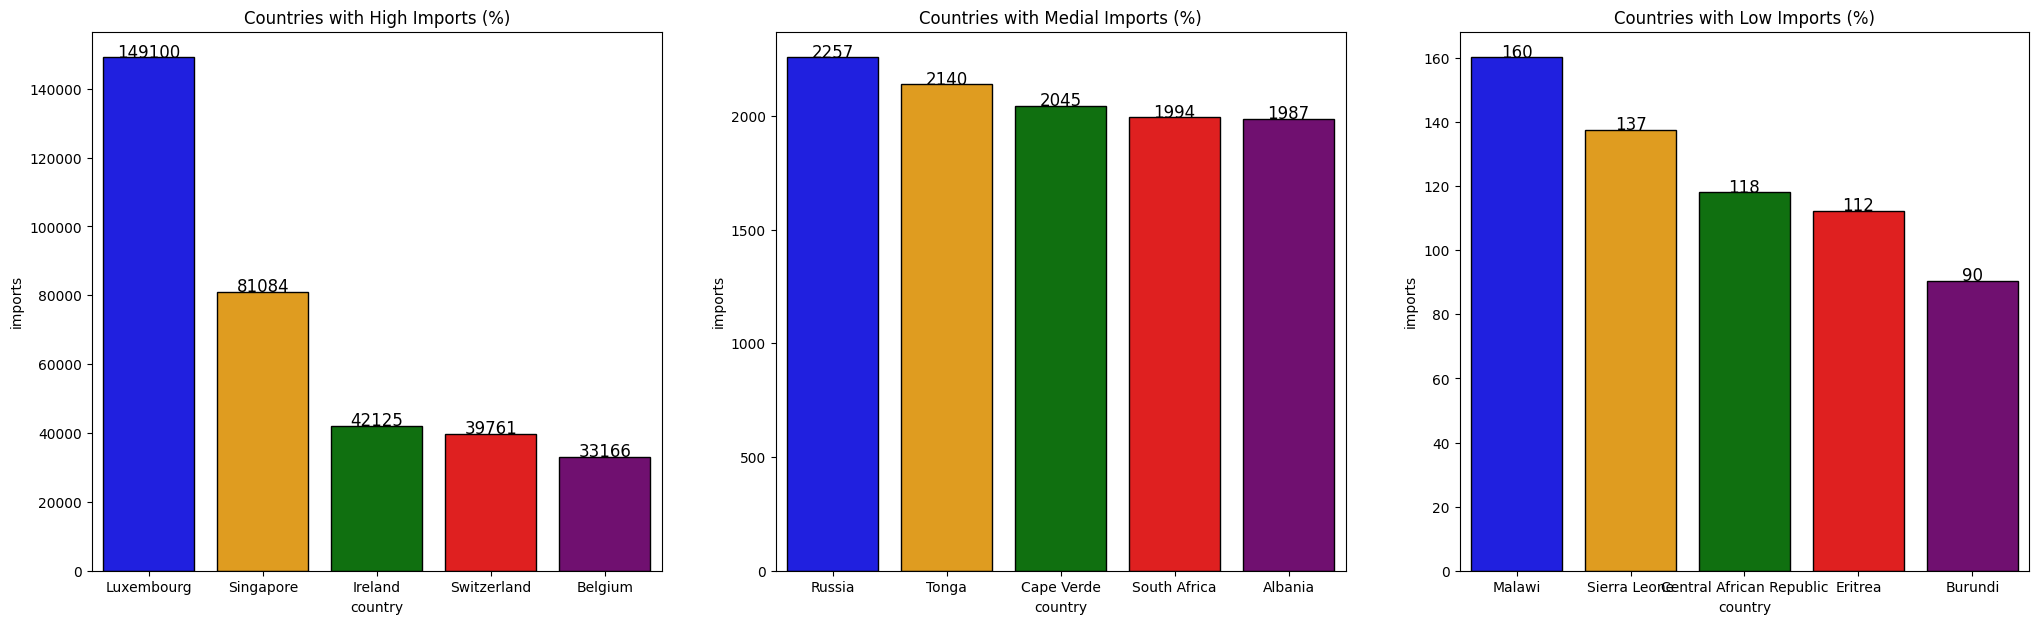

In [88]:
#Country by imports
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'imports', data = country_data.sort_values(ascending = False,by = 'imports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'imports', data = country_data.sort_values(ascending = False,by = 'imports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'imports', data = country_data.sort_values(ascending = False,by = 'imports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- imports stats of a nation describe the self reliance of a nation to solve their problems irrespective of being handicapped on one of the essential resources.
- Singapore, Malta, Luxembourg & Seychelles are present in the top 5 of exports as well as imports. This is just an indication that highlight the nation's strategies of probably capitalizing on their resources and creating solid exports that gets countered by the heavy imports on something else. This just balances the books!
- Brazil has the lowest imports out of all the nations with 11%. Sudan is the only African country present in this lower end list with 17%.

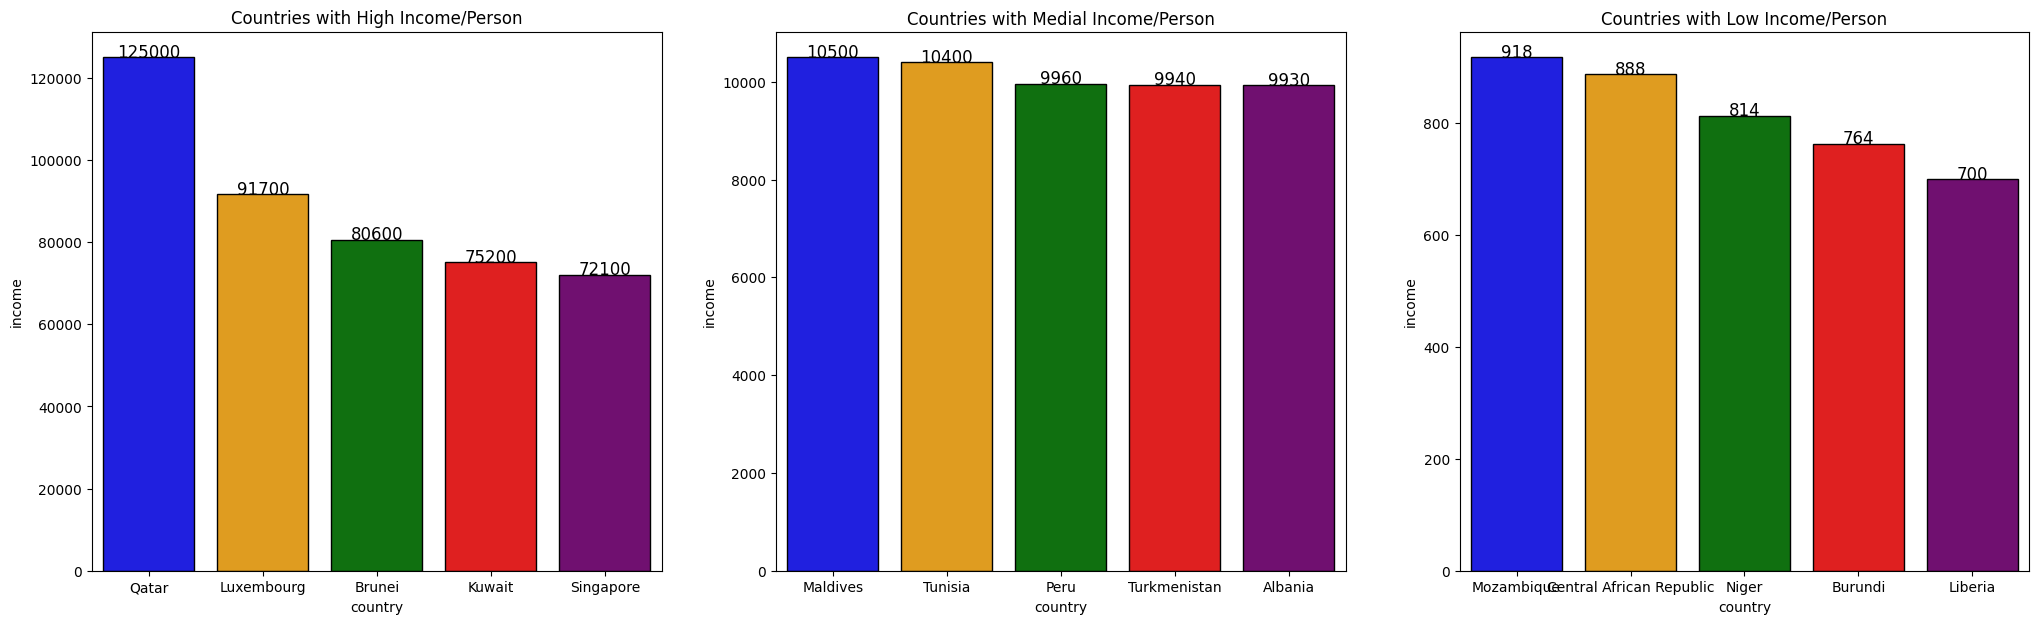

In [89]:
#Country by income
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'income', data = country_data.sort_values(ascending = False,by = 'income').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'income', data = country_data.sort_values(ascending = False,by = 'income').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'income', data = country_data.sort_values(ascending = False,by = 'income').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

Observations:
- Citizens of the Qatar have the highest income out of all the countries with a difference of 30k more than the 2nd placed countries. Singapore & Luxembourg are again present in the top 5 of another feature.
- Lower end of the income is dominated by the African nations. This is influenced by the damage done by colonization out of which the nations have not yet recovered.
- The difference in the income of the nations in the top, middle and lower end is quite significant that will have an effect on every other features.

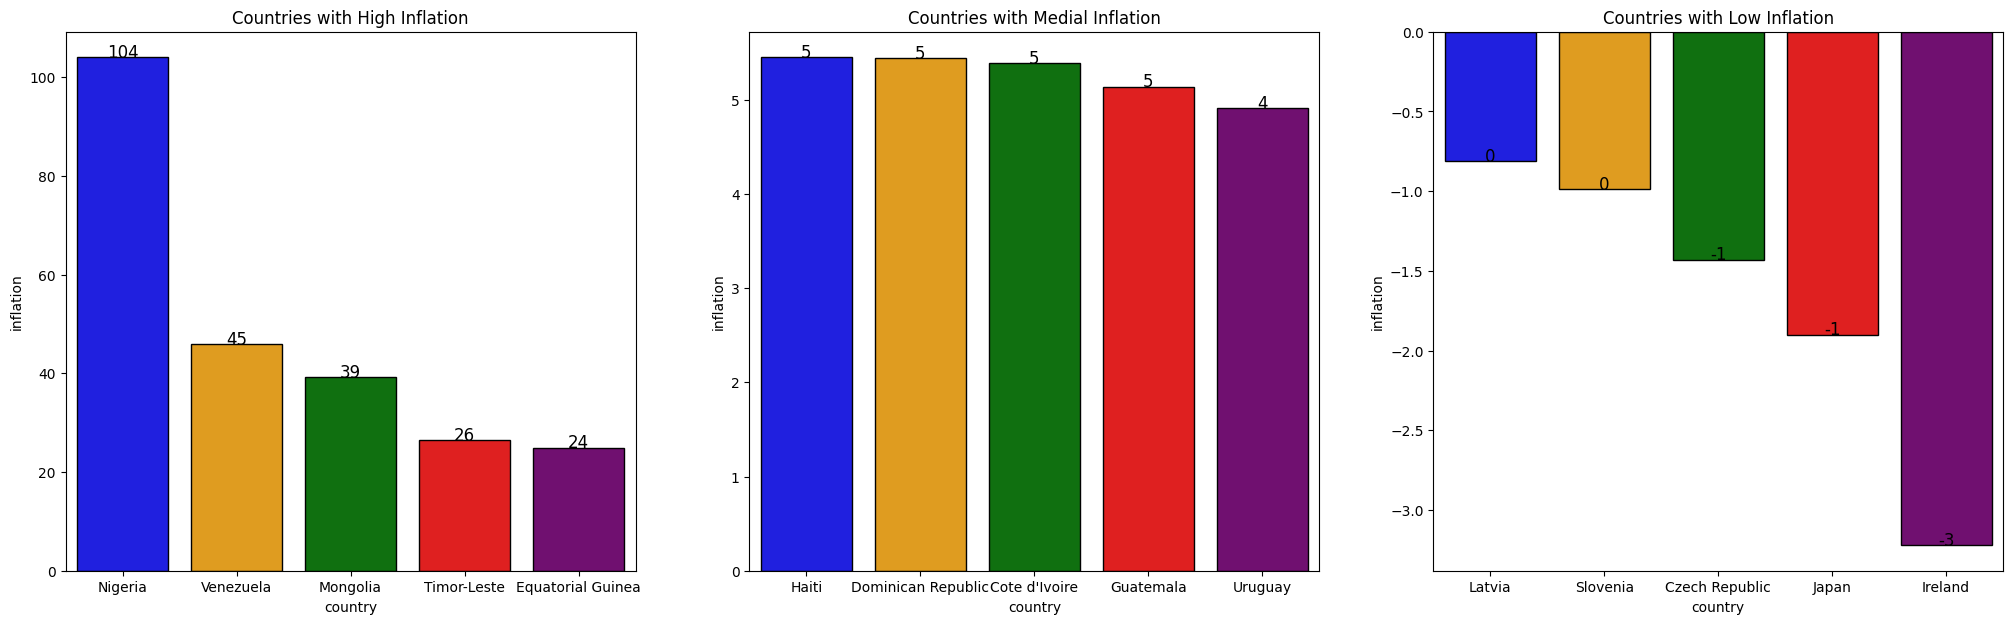

In [90]:
#Country by inflation
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'inflation', data = country_data.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'inflation', data = country_data.sort_values(ascending = False,by = 'inflation').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'inflation', data = country_data.sort_values(ascending = False,by = 'inflation').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

Observations:
- Higher inflation reduces the purchasing power of the citizens. Countries present at the top end of inflation have a devastating economic situation. Having such high inflation is a risk to the existence of the nation.
- Similarly, the lower end of inflation has negative values i.e known as deflation. It signals a economy in a downward spiral leading to a recession or even a depression.

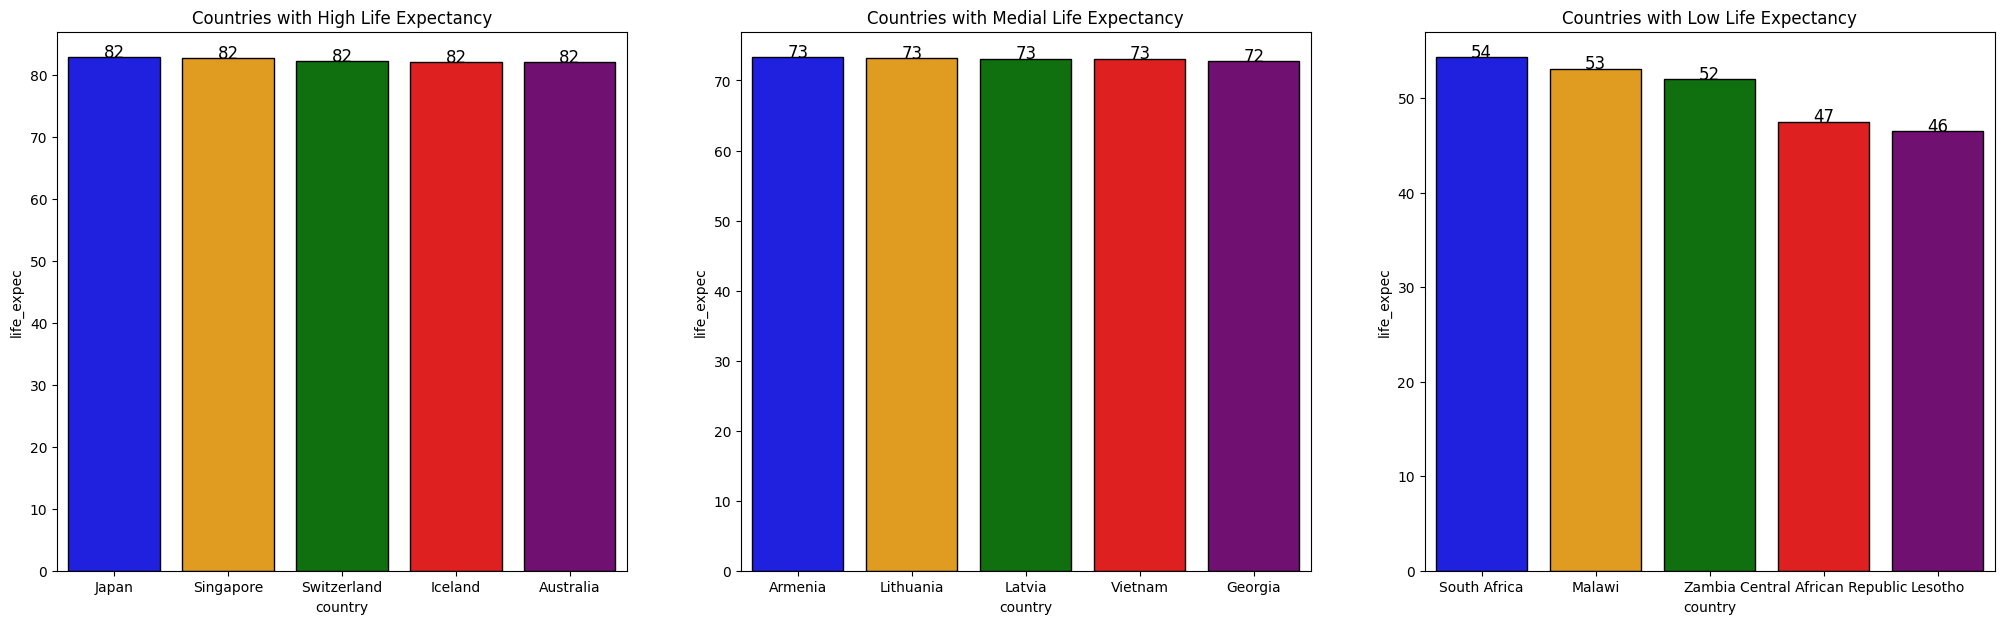

In [91]:
#Country by life expectancy
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'life_expec', data = country_data.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'life_expec', data = country_data.sort_values(ascending = False,by = 'life_expec').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'life_expec', data = country_data.sort_values(ascending = False,by = 'life_expec').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

Observations:
- life_expec depends alot on mental state as well as the lifestyle adopted by the citizens. Singapore is again present in the top of 5 of a feature.
- None of the countries with a high life_expec are present in the top 5 of health that is related to the spending done by the citizen on health.
- African countries are again present in the lower end for another feature.

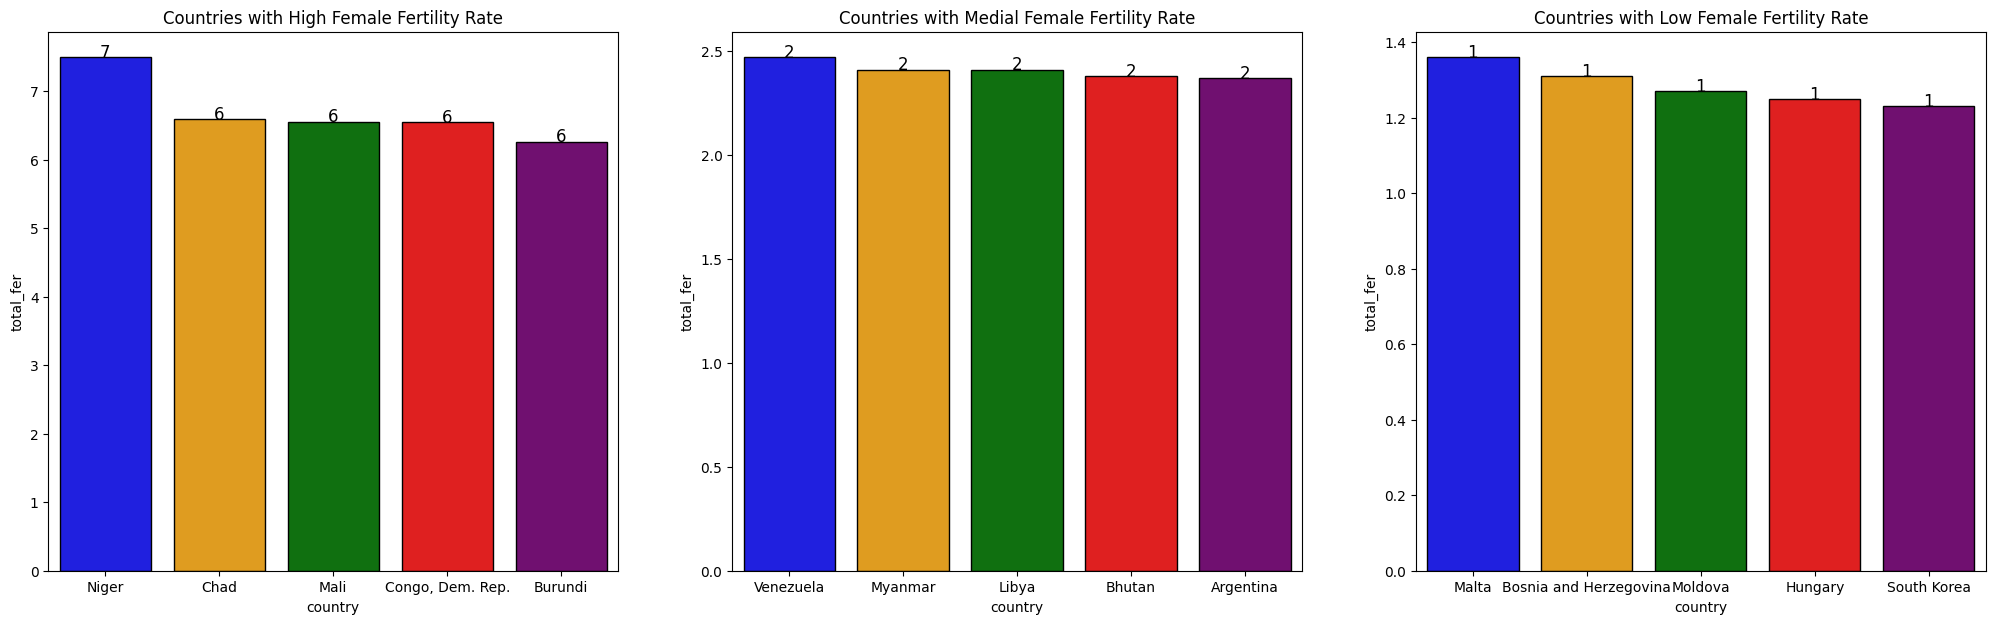

In [92]:
#Country by total fertility
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'total_fer', data = country_data.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'total_fer', data = country_data.sort_values(ascending = False,by = 'total_fer').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'total_fer', data = country_data.sort_values(ascending = False,by = 'total_fer').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

Observations:
- African countries dominate the total_fer with values 6+.
- Mean total_fer value is 2 whereas lower end values of 1 concern abit as well.

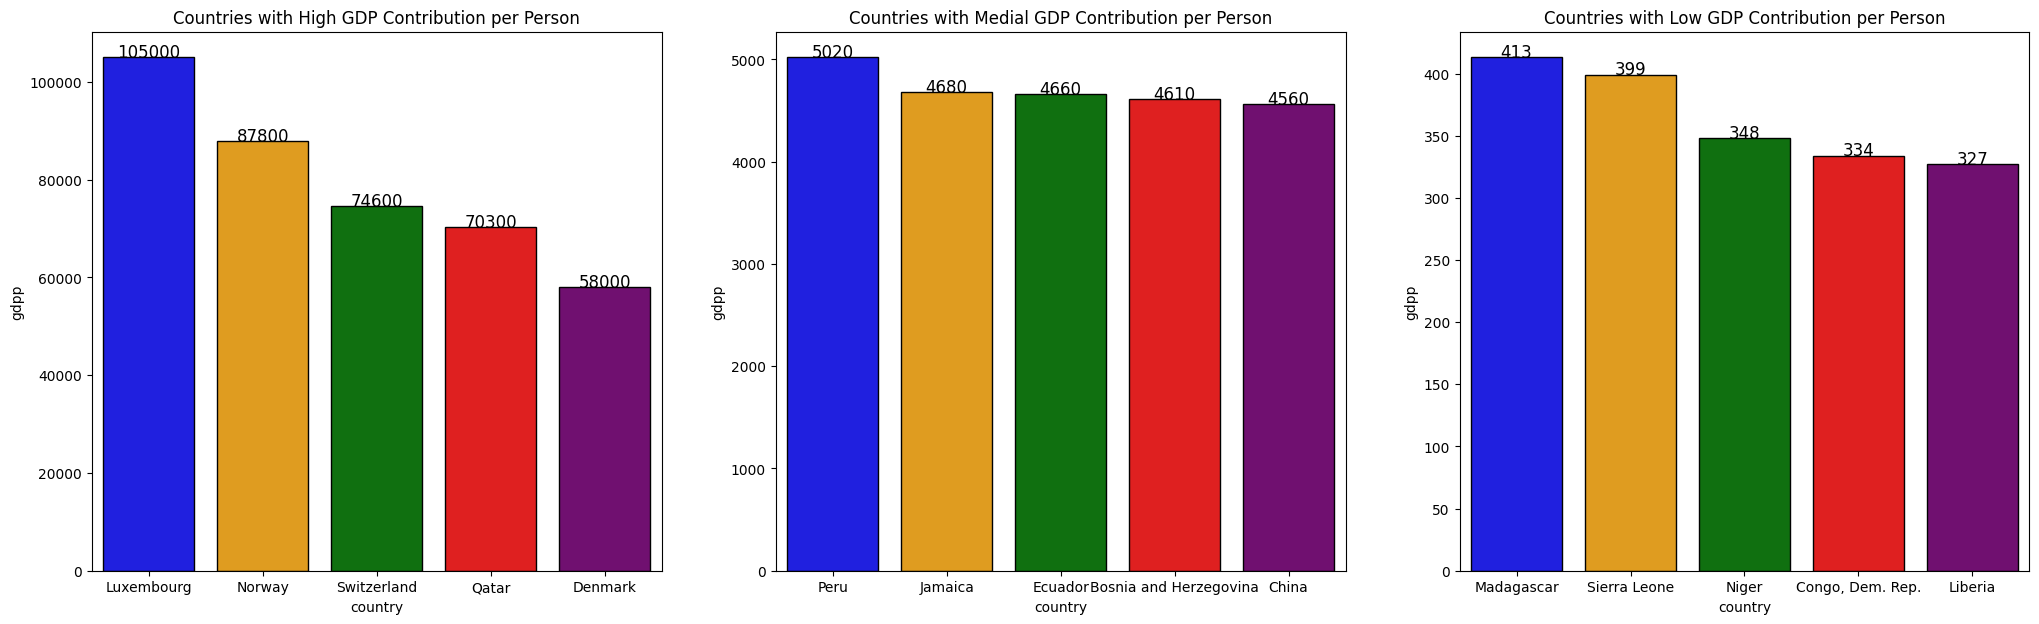

In [93]:
#Country by GDP per capita
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'gdpp', data = country_data.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High GDP Contribution per Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'gdpp', data = country_data.sort_values(ascending = False,by = 'gdpp').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial GDP Contribution per Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'gdpp', data = country_data.sort_values(ascending = False,by = 'gdpp').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low GDP Contribution per Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

Observations:
- It is a tricky feature as the population of the nation is a significant factor. One clear cut example of this is China. It has a huge population alongwith huge GDP.
- Luxembourg is again present in the top ranks. Switzerland & Qatar are present in the top 5 similar to income.
- Lower end is again dominated by African nations that labels them as the economically backward.


In [94]:
country_data_heatmap = country_data.drop('country', axis=1)

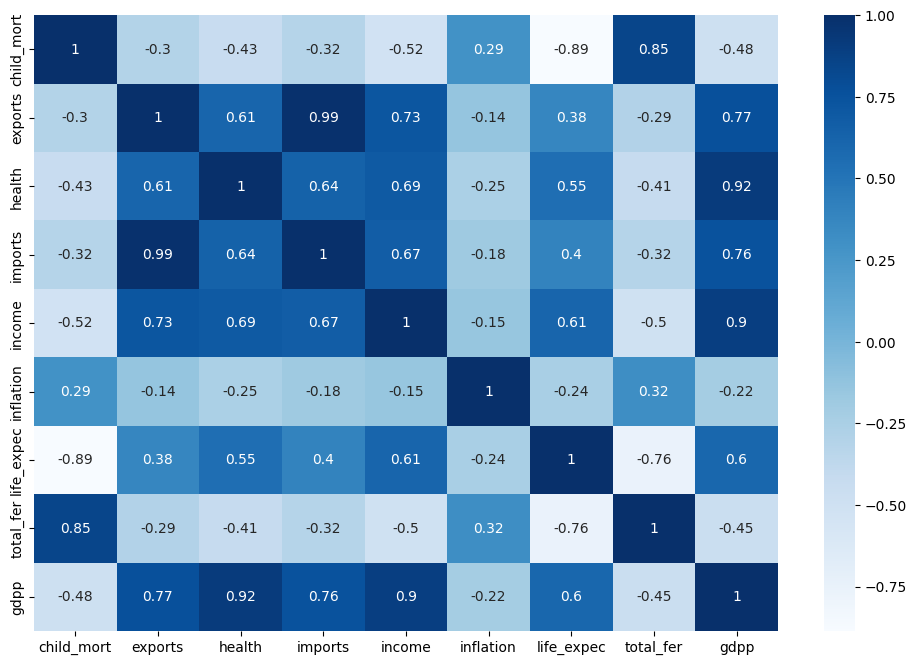

In [95]:
plt.figure(figsize = (12,8))  
sns.heatmap(country_data_heatmap.corr(),annot = True, cmap='Blues')
plt.show()

Observations:
- Many features have relationships with each other.
- child_mort clearly increases when income, gdpp & exports decreases. Rise in inflation also leads to high child_mort cases. Economic conditions unfortunately act as an important factor!
- Rise in exports clearly increases gdpp, income & imports.
- Spending on health has a small rise in life_expec and also decreases the child_mort.
- income & gdpp display a very high 0.95 correlation value. From the health perspective, high income has lead to higher life_expec but decreases the total_fer by some significant margin.
- As expected high inflation has a negative effect on the financial features. High inflation displays a high total_fer and child_mort. This describes the typical features of a backward nation.
- According to the data, higher life_expec displays a low total_fer. Higher gdpp has lead more spending on health.
We can clearly see that some features are essentially from the same category and they have the same reaction to other features of different category.

In [96]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


**Handling Outliers**

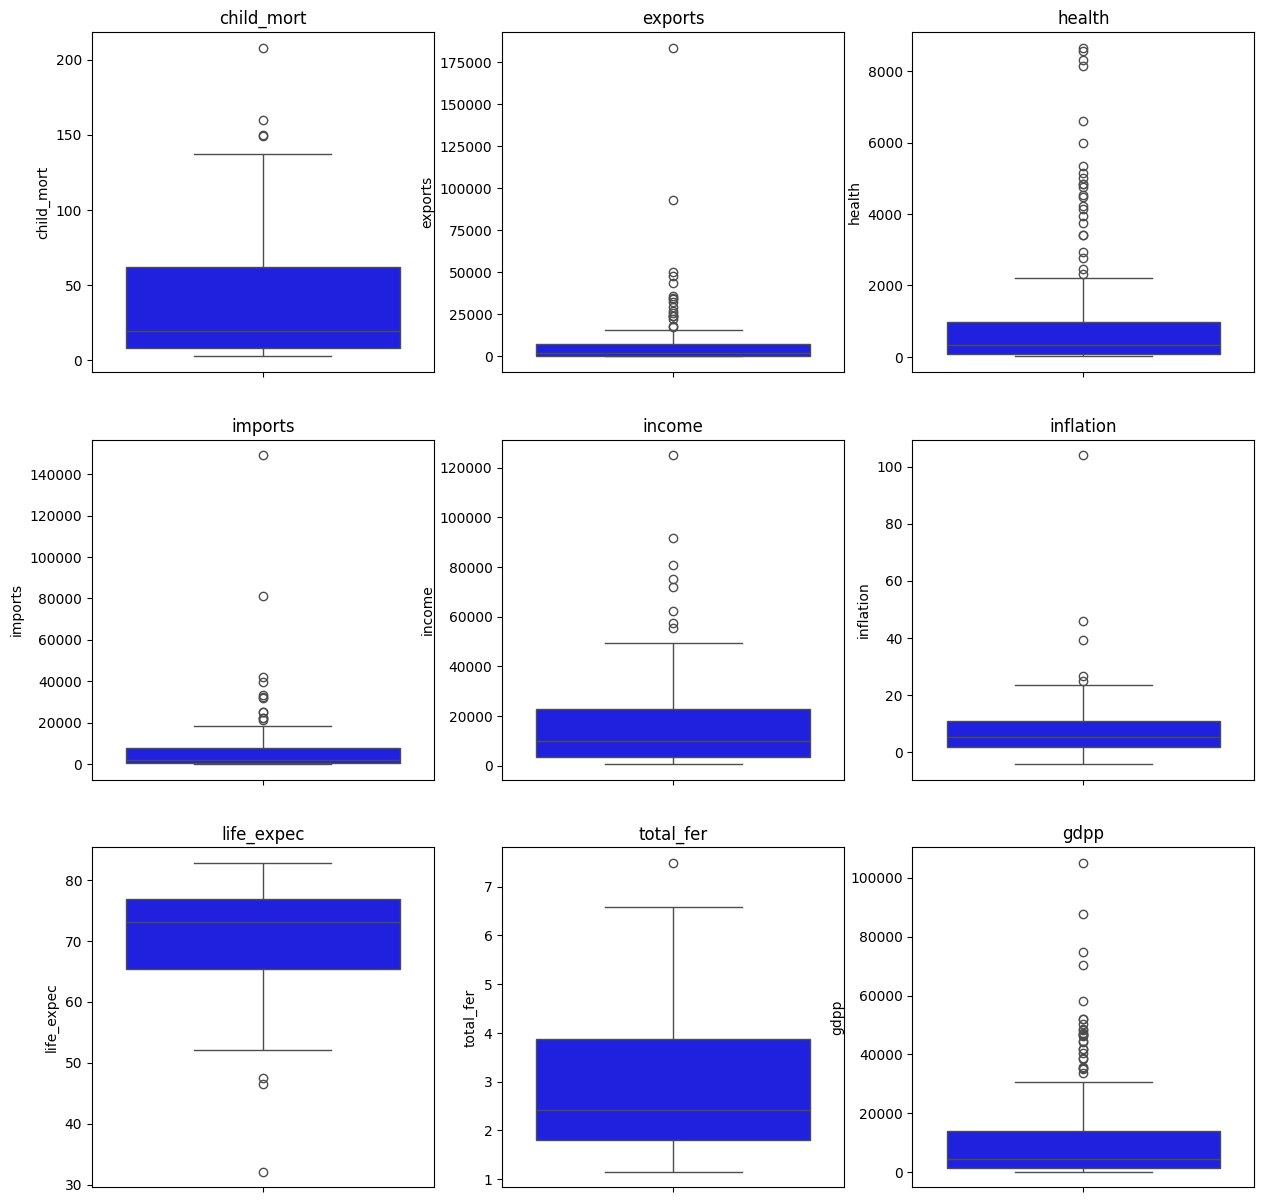

In [97]:
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(country_data[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

Observations: 
- Outliers for features like 'child_mort', 'inflation', 'life_expec', 'total_fer' are at critical socio-economic and health conditions (under-developed countries)
- Outliers for exports, imports, health, income, gdpp features are mostly developed countries with better socio-economic and health conditions than rest. (developed countries)


Since there are so many outliers in the dataset, removing the outliers would mean insufficient data for analysis. So we are handling the outliers using IQR.

In [98]:
#Interquartile Range(IQR)
country_data_updated = country_data.iloc[:,:]

def outliers_for_features(country_data, col):    
    Q1 = country_data.loc[:,col].quantile(0.25)
    Q3 = country_data.loc[:,col].quantile(0.75)
    
    upper_limit = Q3 + 1.5*(Q3-Q1)
    lower_limit = Q1 - 1.5*(Q3-Q1)
    
    return country_data_updated[col].apply(lambda x : upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)
    
for col in ['life_expec','inflation', 'total_fer', 'exports', 'imports', 'health', 'income', 'gdpp']:
    country_data_updated[col] = outliers_for_features(country_data, col)

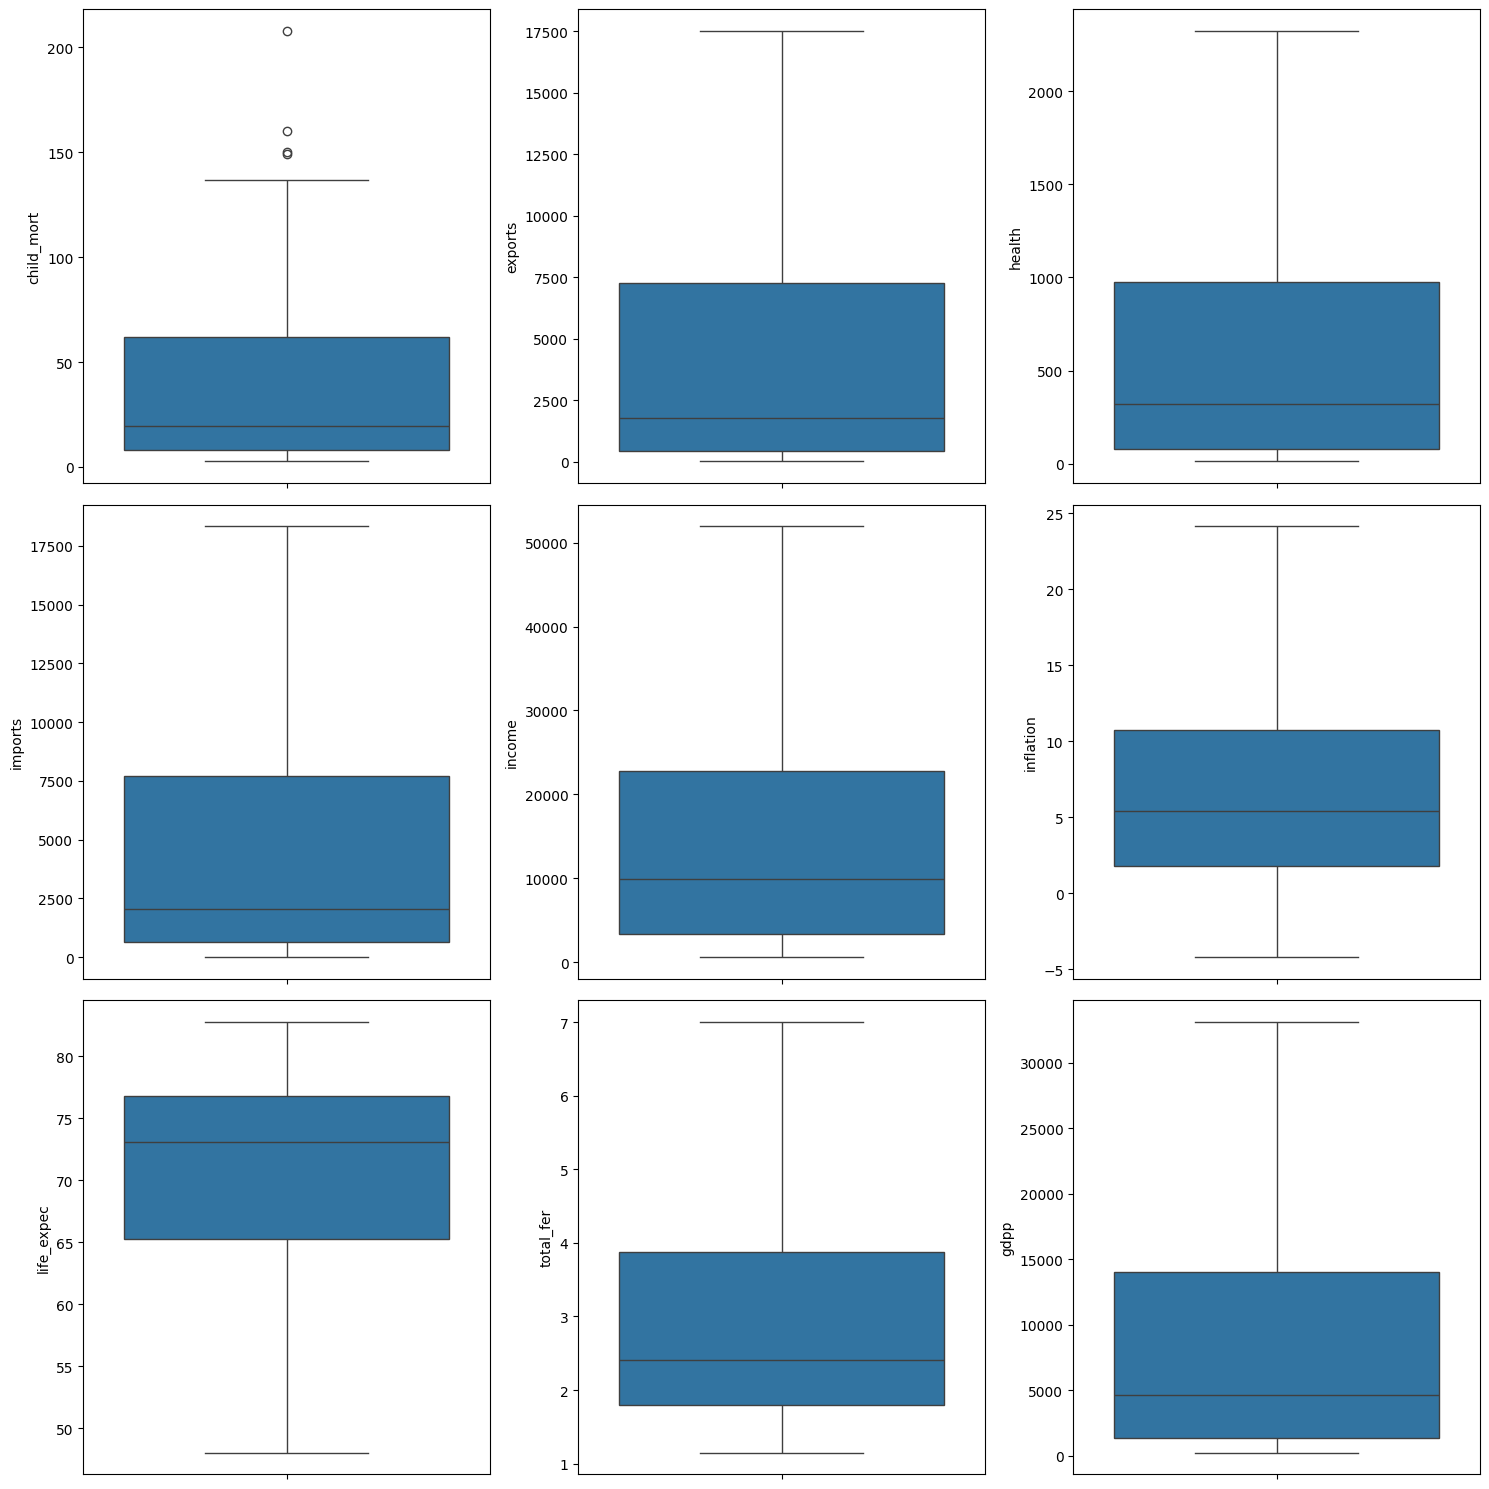

In [99]:
# Checking the distribution after flooring and capping
fig=plt.subplots(nrows = 3,ncols = 3, figsize=(15, 15))

for i, feature in enumerate(country_data_updated.drop('country', axis=1).columns):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(country_data_updated[feature])
    plt.tight_layout()  

In [100]:
country_data_updated

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970.0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,24.16,75.4,2.47,13500.0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310.0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.60,67.5,4.67,1310.0


**Checking Suitability of dataset for clustering, Hopkins test**

In [101]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [135]:
hopkins(country_data.drop('country', axis = 1))

0.9201890522972135

In [130]:
hopkins(country_data_updated.drop('country', axis = 1))

0.9257285404052952

High value of Hopkins Statistics implements that dataset has high tendency to cluster.

**Scaling the data**

In [136]:
standard_scaler = StandardScaler()
country_data_scaled = standard_scaler.fit_transform(country_data_updated.iloc[:, 1:])

## **Clustering** ##

**Hyperparameter Tuning**

**K-means clustering and "k":**
In K-means clustering, the "k" value determines the number of clusters the data will be divided into, making it a critical hyperparameter to tune.

**Elbow method and silhouette analysis:**
These are techniques used to visually identify the optimal "k" value by analyzing plots that show how well the data is clustered based on different "k" values.

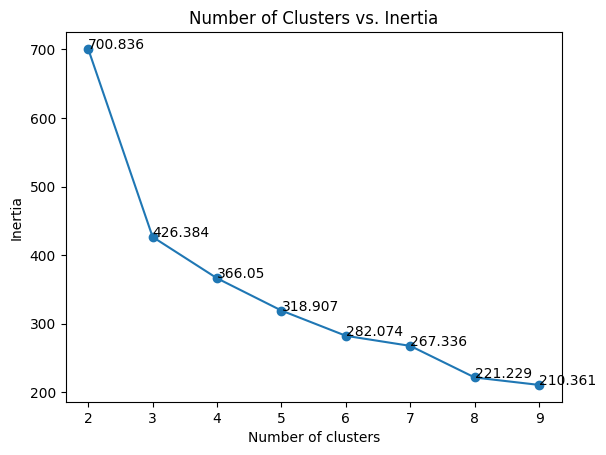

In [137]:
#elbow method
ssd = []
num_of_clusters = list(range(2,10))

for n in num_of_clusters:
    km = KMeans(n_clusters = n, max_iter = 50, random_state=101).fit(country_data_scaled)
    ssd.append(km.inertia_)
    
plt.plot(num_of_clusters, ssd, marker='o')

for xy in zip(num_of_clusters, ssd):    
    plt.annotate(text = round(xy[1],3), xy = xy,  textcoords='data')

plt.xlabel("Number of clusters")
plt.ylabel("Inertia") # Inertia is within cluster sum of squares
plt.title("Number of Clusters vs. Inertia")
plt.show()

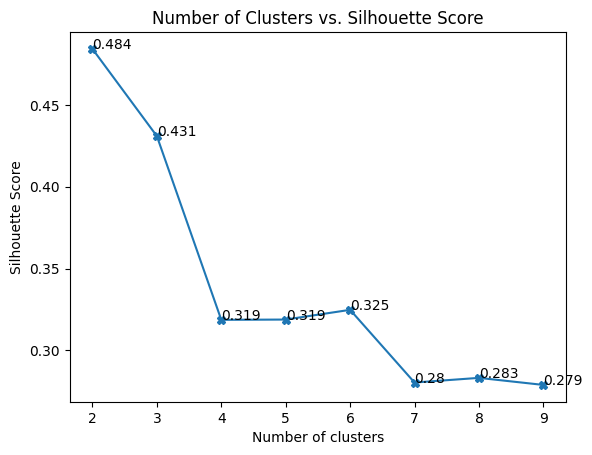

In [138]:
#silhoutte analysis
silhouette_value = []
for n in range(2,10):
    km = KMeans(n_clusters = n, random_state=101).fit(country_data_scaled)
    silhouette_value.append(silhouette_score(country_data_scaled, km.labels_))
    
plt.plot(num_of_clusters, silhouette_value, marker='X', label=silhouette_value)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score")

for xy in zip(num_of_clusters, silhouette_value):    
    plt.annotate(text = round(xy[1],3), xy = xy,  textcoords='data')
    
plt.show()

K=2 has highest Silhouette score but it will make more sense to take more than 2 clusters for under-developed, developing and developed countries.

Hence we are choosing K = 3.

**K Means Clustering**

In [139]:
# Building K Means model with 3 clusters
km = KMeans(n_clusters=3, max_iter=100 , random_state = 101)
km.fit(country_data_scaled)

KMeans(max_iter=100, n_clusters=3, random_state=101)

In [140]:
print(km.labels_)
print(km.labels_.shape)

[1 0 0 1 0 0 0 2 2 0 2 2 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 2 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 2 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 2 1 0 0 0 0 0 2 2 0 0 1 0 2 1 0 0 1 2 2 2 1 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]
(167,)


**Hierarchial Clustering**

Single linkage and complete linkage are two approaches to define how the distance between clusters is calculated during hierarchical clustering. They are hyperparameters because their choice influences the clustering result. By tuning these methods, we aim to find the best representation of clusters in our data.

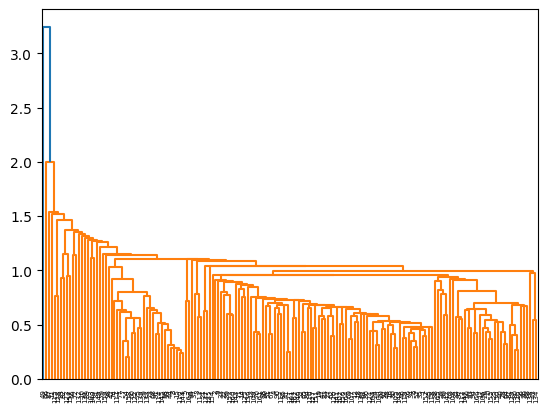

In [144]:
#single linkage method
mergings_single = linkage(country_data_scaled, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

- With single linkage clusters are not interpretable.
- Using complete linkage.

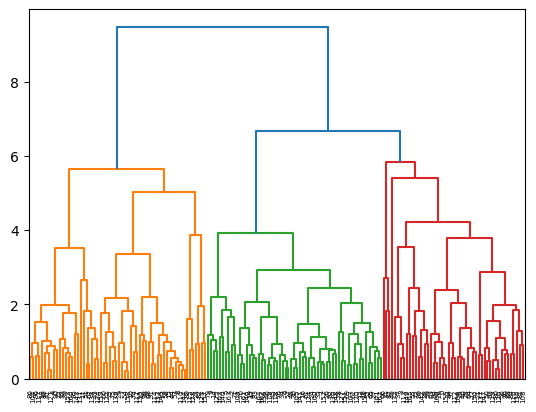

In [145]:
#complete linkage method
mergings_complete = linkage(country_data_scaled, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

The dendogram generate from Hierarchical Clustering with complete linkage shows 3 clusters distinctly. Hence 3 clusters are chosen.

In [146]:
# Taking 3 clusters for hierarchical clustering
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
print(cluster_labels)
print(cluster_labels.shape)   

[0 1 1 0 2 1 1 2 2 1 2 2 1 2 1 2 1 0 1 1 1 0 2 2 1 0 0 1 0 2 1 0 0 2 1 1 0
 0 0 2 0 2 2 2 2 1 1 1 1 0 0 2 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 2 2 1 1 1 0 2
 2 2 1 2 1 1 0 0 2 1 0 2 2 0 0 2 2 2 1 0 0 2 2 0 2 0 1 1 1 1 2 1 0 1 0 1 2
 2 0 0 2 2 0 2 1 1 1 2 2 2 1 1 0 1 2 0 1 2 0 2 2 2 0 0 2 2 1 1 0 2 2 2 1 0
 1 0 0 1 1 2 1 0 1 2 2 2 2 1 1 1 1 0 0]
(167,)


In [147]:
country_data_clustered = country_data_updated.iloc[:,:]
country_data_clustered = pd.concat([country_data_clustered, pd.DataFrame(km.labels_, columns=['cluster_id_km'])], axis = 1)
country_data_clustered = pd.concat([country_data_clustered, pd.DataFrame(cluster_labels, columns=['cluster_id_hc'])], axis = 1)
country_data_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km,cluster_id_hc
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,2


The new dataframe country_data_clustered has original data along with cluster labels given by both K Means and Hierarchical clustering model

In [149]:
print(country_data_clustered['cluster_id_km'].value_counts())
print(country_data_clustered['cluster_id_hc'].value_counts())

cluster_id_km
0    78
1    48
2    41
Name: count, dtype: int64
cluster_id_hc
2    60
1    59
0    48
Name: count, dtype: int64


In [150]:
print("Cluster 0 of Hierarchical Clustering model")
print(country_data_clustered[country_data_clustered['cluster_id_hc'] == 0].country.unique())

print("Cluster 1 of Hierarchical Clustering model")
print(country_data_clustered[country_data_clustered['cluster_id_hc'] == 1].country.unique())

print("Cluster 2 of Hierarchical Clustering model")
print(country_data_clustered[country_data_clustered['cluster_id_hc'] == 2].country.unique())

Cluster 0 of Hierarchical Clustering model
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
Cluster 1 of Hierarchical Clustering model
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Bangladesh'
 'Belarus' 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'China' 'Colombia' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana'
 'India' 'Indonesia' 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Kyrgyz Republic

In [151]:
print("Cluster 0 of KMeans model")
print(country_data_clustered[country_data_clustered['cluster_id_km'] == 0].country.unique())

print("Cluster 1 of KMeans model")
print(country_data_clustered[country_data_clustered['cluster_id_km'] == 1].country.unique())

print("Cluster 2 of KMeans model")
print(country_data_clustered[country_data_clustered['cluster_id_km'] == 2].country.unique())

Cluster 0 of KMeans model
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bangladesh' 'Barbados' 'Belarus' 'Belize' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cambodia'
 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Fiji' 'Georgia'
 'Grenada' 'Guatemala' 'Guyana' 'India' 'Indonesia' 'Iran' 'Jamaica'
 'Jordan' 'Kazakhstan' 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Libya'
 'Lithuania' 'Macedonia, FYR' 'Malaysia' 'Maldives' 'Mauritius'
 'Micronesia, Fed. Sts.' 'Moldova' 'Mongolia' 'Montenegro' 'Morocco'
 'Myanmar' 'Nepal' 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland'
 'Romania' 'Russia' 'Samoa' 'Serbia' 'Seychelles' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan' 'Thailand'
 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine' 'Uruguay'
 'Uzbekistan' 'Vanuatu' 'Venezuela' 'Vietnam']
Cluster 1 of KMeans model
['Afghanistan' 'Angola' 'Benin' 'Bo

**Cluster Profiling**

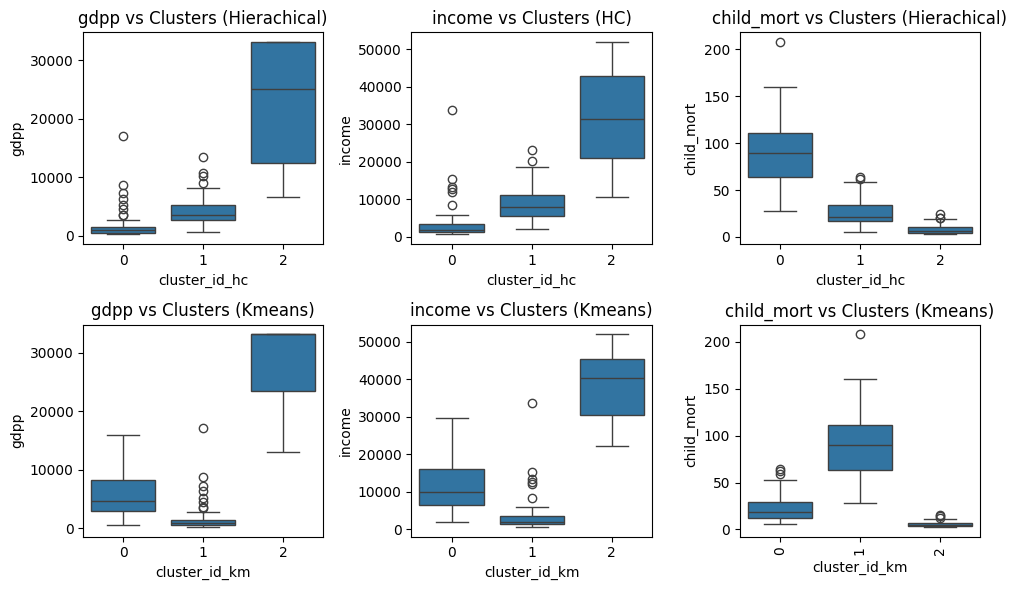

In [156]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2, 3, 1, title="gdpp vs Clusters (Hierachical)")
ax4 = fig.add_subplot(2, 3, 4, title="gdpp vs Clusters (Kmeans)")

ax2 = fig.add_subplot(2, 3, 2, title="income vs Clusters (HC)")
ax5 = fig.add_subplot(2, 3, 5, title="income vs Clusters (Kmeans)")

ax3 = fig.add_subplot(2, 3, 3, title="child_mort vs Clusters (Hierachical)")
ax6 = fig.add_subplot(2, 3, 6, title="child_mort vs Clusters (Kmeans)")

sns.boxplot(x = 'cluster_id_hc', y = 'gdpp',data = country_data_clustered,ax=ax1)
sns.boxplot(x = 'cluster_id_km', y = 'gdpp',data = country_data_clustered,ax=ax4)

sns.boxplot(x = 'cluster_id_hc', y = 'income',data = country_data_clustered,ax=ax2)
sns.boxplot(x = 'cluster_id_km', y = 'income',data = country_data_clustered,ax=ax5)

sns.boxplot(x = 'cluster_id_hc', y = 'child_mort',data = country_data_clustered,ax=ax3)
sns.boxplot(x = 'cluster_id_km', y = 'child_mort',data = country_data_clustered,ax=ax6)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observation:
- Cluster 0 of Hierarchical model is similar with cluster 1 of Kmeans model (socio-economically backward countries/under developed countries)
- Cluster 1 of Hierarchical model is similar with cluster 0 of Kmeans model
- Cluster 2 of Hierarchical model is similar with cluster 2 of Kmeans model (socio-economically forward countries)

Analyse the clusters and identify the ones which are in dire need of aid. We can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.

Also, we need to perform visualisations on the clusters that have been formed. We can do this by choosing any two of the three variables mentioned above on the X-Y axes and plotting a scatter plot of all the countries and differentiating the clusters. So we make sure we create visualisations for all the three pairs.

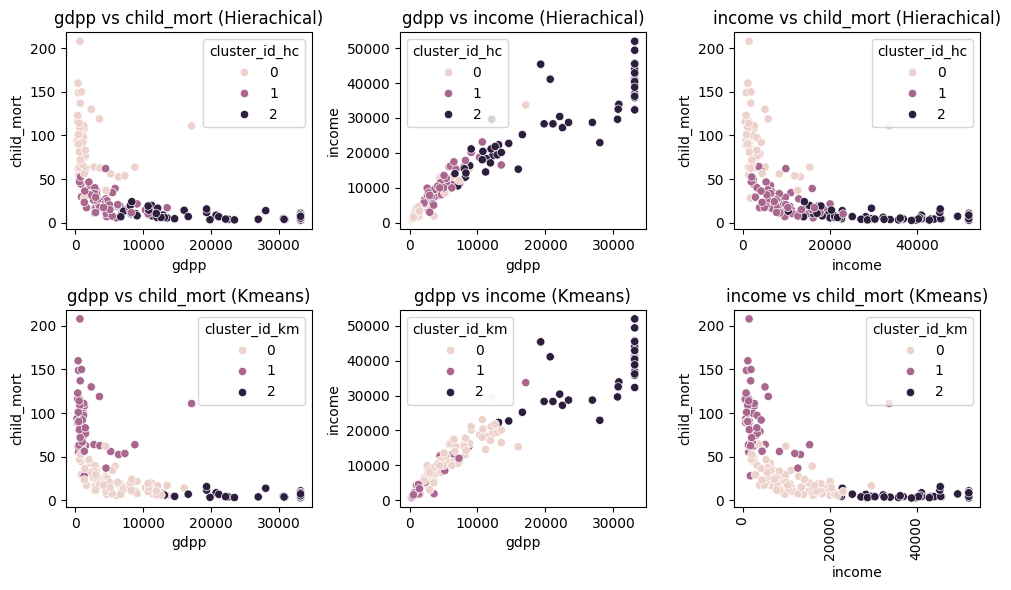

In [162]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2, 3, 1, title="gdpp vs child_mort (Hierachical)")
ax4 = fig.add_subplot(2, 3, 4, title="gdpp vs child_mort (Kmeans)")

ax2 = fig.add_subplot(2, 3, 2, title="gdpp vs income (Hierachical)")
ax5 = fig.add_subplot(2, 3, 5, title="gdpp vs income (Kmeans)")

ax3 = fig.add_subplot(2, 3, 3, title="income vs child_mort (Hierachical)")
ax6 = fig.add_subplot(2, 3, 6, title="income vs child_mort (Kmeans)")

sns.scatterplot(x = 'gdpp', y = 'child_mort',data = country_data_clustered,hue=country_data_clustered['cluster_id_hc'], ax=ax1)
sns.scatterplot(x = 'gdpp', y = 'child_mort',data = country_data_clustered,hue=country_data_clustered['cluster_id_km'], ax=ax4)

sns.scatterplot(x = 'gdpp', y = 'income',data = country_data_clustered,hue=country_data_clustered['cluster_id_hc'], ax=ax2)
sns.scatterplot(x = 'gdpp', y = 'income',data = country_data_clustered,hue=country_data_clustered['cluster_id_km'], ax=ax5)

sns.scatterplot(x = 'income', y = 'child_mort',data = country_data_clustered,hue=country_data_clustered['cluster_id_hc'], ax=ax3)
sns.scatterplot(x = 'income', y = 'child_mort',data = country_data_clustered,hue=country_data_clustered['cluster_id_km'], ax=ax6)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observation:
Top row represents results of Hierarchical Clustering and bottom row represents KMeans Clustering. Each column represents same pair of features.

- Countries with low gdpp (GDP per capita) have high child mortality

- Countries with low income (Net income per person) have high child mortality

- gdpp and income have strong linear relationship

- From the 3 features (gdpp, income and child_mort), the countries that need the financial aid at most belong to cluster 0 of hierarchical model and cluster 1 of K means model.

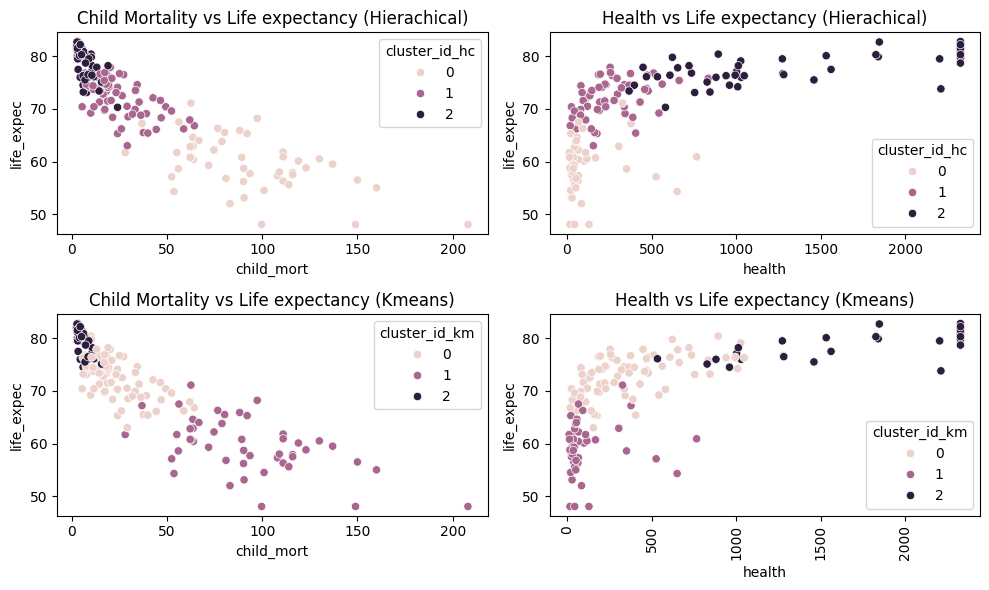

In [163]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2, 2, 1, title="Child Mortality vs Life expectancy (Hierachical)")
ax3 = fig.add_subplot(2, 2, 3, title="Child Mortality vs Life expectancy (Kmeans)")
ax2 = fig.add_subplot(2, 2, 2, title="Health vs Life expectancy (Hierachical)")
ax4 = fig.add_subplot(2, 2, 4, title="Health vs Life expectancy (Kmeans)")

sns.scatterplot(x = 'child_mort', y = 'life_expec',data = country_data_clustered,hue=country_data_clustered['cluster_id_hc'], ax=ax1)
sns.scatterplot(x = 'child_mort', y = 'life_expec',data = country_data_clustered,hue=country_data_clustered['cluster_id_km'], ax=ax3)

sns.scatterplot(x = 'health', y = 'life_expec',data = country_data_clustered,hue=country_data_clustered['cluster_id_hc'], ax=ax2)
sns.scatterplot(x = 'health', y = 'life_expec',data = country_data_clustered,hue=country_data_clustered['cluster_id_km'], ax=ax4)


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [165]:
# Under-developed countries obtained from both the models

country_data_clustered[(country_data_clustered['cluster_id_hc']==0) | (country_data_clustered['cluster_id_km']==1)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=[True, True, False])[['country','cluster_id_hc','cluster_id_km']]


,country,cluster_id_hc,cluster_id_km
26,Burundi,0,1
88,Liberia,0,1
37,"Congo, Dem. Rep.",0,1
112,Niger,0,1
132,Sierra Leone,0,1
93,Madagascar,0,1
106,Mozambique,0,1
31,Central African Republic,0,1
94,Malawi,0,1
50,Eritrea,0,1


These are the list of countries that need financial aid from HELP International NGO.

**Conclusion and Comparision of Models**

- gdpp, income and child_mort are 3 main driving factors for clustering.

- Low gdpp and income imply high rate of child mortality.

- Life expectancy in the under-developed countries is low because of high child mortality rate.

- Hierarchical Clustering model is chosen as final model as Kmeans can produce different results depending on the initial positions of the centroids of the cluster.

- Also K Means needs prespecified number of clusters.

- In Hierarchical model, the dendogram has better interpretability than KMeans and also does not need the number of clusters to be specified before.

Hence, Hierarchical Clustering model is chosen for the final list of countries.